# World Happiness

Context

The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

Content

The happiness scores and rankings use data from the Gallup World Poll. The scores are based on answers to the main life evaluation question asked in the poll. This question, known as the Cantril ladder, asks respondents to think of a ladder with the best possible life for them being a 10 and the worst possible life being a 0 and to rate their own current lives on that scale. The scores are from nationally representative samples for the years 2013-2016 and use the Gallup weights to make the estimates representative. The columns following the happiness score estimate the extent to which each of six factors – economic production, social support, life expectancy, freedom, absence of corruption, and generosity – contribute to making life evaluations higher in each country than they are in Dystopia, a hypothetical country that has values equal to the world’s lowest national averages for each of the six factors. They have no impact on the total score reported for each country, but they do explain why some countries rank higher than others.

Inspiration

What countries or regions rank the highest in overall happiness and each of the six factors contributing to happiness? How did country ranks or scores change between the 2015 and 2016 as well as the 2016 and 2017 reports? Did any country experience a significant increase or decrease in happiness?

What is Dystopia?

Dystopia is an imaginary country that has the world’s least-happy people. The purpose in establishing Dystopia is to have a benchmark against which all countries can be favorably compared (no country performs more poorly than Dystopia) in terms of each of the six key variables, thus allowing each sub-bar to be of positive width. The lowest scores observed for the six key variables, therefore, characterize Dystopia. Since life would be very unpleasant in a country with the world’s lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom and least social support, it is referred to as “Dystopia,” in contrast to Utopia.

What are the residuals?

The residuals, or unexplained components, differ for each country, reflecting the extent to which the six variables either over- or under-explain average 2014-2016 life evaluations. These residuals have an average value of approximately zero over the whole set of countries. Figure 2.2 shows the average residual for each country when the equation in Table 2.1 is applied to average 2014- 2016 data for the six variables in that country. We combine these residuals with the estimate for life evaluations in Dystopia so that the combined bar will always have positive values. As can be seen in Figure 2.2, although some life evaluation residuals are quite large, occasionally exceeding one point on the scale from 0 to 10, they are always much smaller than the calculated value in Dystopia, where the average life is rated at 1.85 on the 0 to 10 scale.

What do the columns succeeding the Happiness Score(like Family, Generosity, etc.) describe?

The following columns: GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption describe the extent to which these factors contribute in evaluating the happiness in each country. The Dystopia Residual metric actually is the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country as stated in the previous answer.

If you add all these factors up, you get the happiness score so it might be un-reliable to model them to predict Happiness Scores.

The dataset consists of the happiness score and rank for different countries. We will use the data to analyse the following set of questions

1. What are the factors that govern happiness index?
2. Is happiness dependent on the Region?
3. Corelation of the variables.
4. Visualizing the factors that  affect the happiness score for a country.

#### Load the Necessary Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("input"))

# Any results you write to the current directory are saved as output.

from subprocess import check_output
print(check_output(["ls", "input"]).decode("utf8"))

['2015.csv', '2016.csv', '2017.csv']
2015.csv
2016.csv
2017.csv



### Read the data into dataframe and use the data

From above it's visible that we have 3 different CSV files for the years 2015, 2016, 2017. we will analyze one by one and conclude

#### Analyze the 2017 dataset

In [2]:
data = pd.read_csv("input/2017.csv")
print("Data Info")
#data.info()
#Change . sepertor with _ 
data.columns = data.columns.str.replace(".", "_")
data_15 = pd.read_csv("input/2015.csv")
data_16 = pd.read_csv("input/2016.csv")

#data_15.info()
#data_16.info()
#data_17.info()
data_tmp=data_15[["Country","Region"]]

#data_tmp.info()

data=data.merge(data_tmp, on="Country")
data.info()

#if x == 'Z' else 'green' for x in df['Set']



Data Info
<class 'pandas.core.frame.DataFrame'>
Int64Index: 149 entries, 0 to 148
Data columns (total 13 columns):
Country                          149 non-null object
Happiness_Rank                   149 non-null int64
Happiness_Score                  149 non-null float64
Whisker_high                     149 non-null float64
Whisker_low                      149 non-null float64
Economy__GDP_per_Capita_         149 non-null float64
Family                           149 non-null float64
Health__Life_Expectancy_         149 non-null float64
Freedom                          149 non-null float64
Generosity                       149 non-null float64
Trust__Government_Corruption_    149 non-null float64
Dystopia_Residual                149 non-null float64
Region                           149 non-null object
dtypes: float64(10), int64(1), object(2)
memory usage: 16.3+ KB


In [3]:
data.tail() 

,Country,Happiness_Rank,Happiness_Score,Whisker_high,Whisker_low,Economy__GDP_per_Capita_,Family,Health__Life_Expectancy_,Freedom,Generosity,Trust__Government_Corruption_,Dystopia_Residual,Region
144,Rwanda,151,3.471,3.543030,3.398970,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061,Sub-Saharan Africa
145,Syria,152,3.462,3.663669,3.260331,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574,Middle East and Northern Africa
146,Tanzania,153,3.349,3.461430,3.236570,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130,Sub-Saharan Africa
147,Burundi,154,2.905,3.074690,2.735310,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024,Sub-Saharan Africa
148,Central African Republic,155,2.693,2.864884,2.521116,0.000000,0.000000,0.018773,0.270842,0.280876,0.056565,2.066005,Sub-Saharan Africa


### Change Column Name of the dataframe

In [4]:
data.columns = data.columns.str.replace("Economy__GDP_per_Capita_", "Economy")
data.columns = data.columns.str.replace("Health__Life_Expectancy_","Health")
data.columns = data.columns.str.replace("Trust__Government_Corruption_","Government_trust")
data.columns

Index(['Country', 'Happiness_Rank', 'Happiness_Score', 'Whisker_high',
       'Whisker_low', 'Economy', 'Family', 'Health', 'Freedom', 'Generosity',
       'Government_trust', 'Dystopia_Residual', 'Region'],
      dtype='object')

### Plot the heatmap to understand the co-relation of columns

Correlation among variables

First, we will try to understand the correlation between few variables. For this, first compute the correlation matrix among the variables and plotted as heat map.

2017 data set


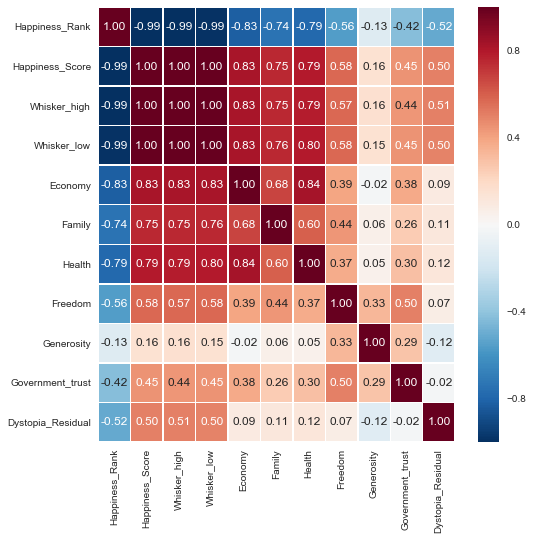

,Happiness_Rank,Happiness_Score,Whisker_high,Whisker_low,Economy,Family,Health,Freedom,Generosity,Government_trust,Dystopia_Residual
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,77.751678,5.360450,5.457253,5.263646,0.988951,1.195500,0.554728,0.407331,0.246575,0.121724,1.845602
std,45.125037,1.138367,1.125652,1.152043,0.414807,0.285625,0.233135,0.149730,0.136281,0.101727,0.482061
min,1.000000,2.693000,2.864884,2.521116,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377914
25%,39.000000,4.497000,4.601604,4.372639,0.667225,1.043280,0.397523,0.300741,0.153075,0.056767,1.597970
50%,78.000000,5.279000,5.370032,5.193152,1.069318,1.255585,0.613212,0.437454,0.230947,0.088174,1.826705
75%,117.000000,6.105000,6.191957,6.018043,1.315175,1.419921,0.719217,0.508190,0.325296,0.153066,2.138506
max,155.000000,7.537000,7.622030,7.479556,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,2.898639


In [5]:
print("2017 data set")
data.corr() 
#correlation map view
f, ax = plt.subplots(figsize = (8,8))
sns.heatmap(data.corr(), annot = True, linewidths=.5, fmt = ".2f", ax=ax)
plt.show()
data.describe()

From the heat map its evident that the happiness score is dependent on Economy,Family,Health . Let us plot graphs to confirm the dependency

### Plot the dependent columns based on the hapiness score

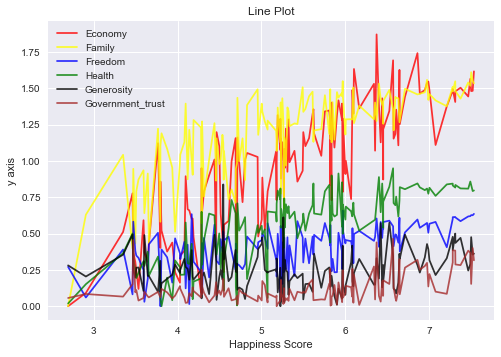

In [6]:
plt.plot(data.Happiness_Score, data.Economy, color = "red", label = "Economy",alpha = 0.8)
plt.plot(data.Happiness_Score, data.Family, color = "yellow", label = "Family",alpha = 0.8)
plt.plot(data.Happiness_Score, data.Freedom, color = "blue", label = "Freedom",alpha = 0.8)
plt.plot(data.Happiness_Score, data.Health, color = "green", label = "Health",alpha = 0.8)
plt.plot(data.Happiness_Score, data.Generosity, color = "black", label = "Generosity",alpha = 0.8)
plt.plot(data.Happiness_Score, data.Government_trust, color = "brown", label = "Government_trust",alpha = 0.8)


plt.legend()    
plt.xlabel('Happiness Score')           
plt.ylabel('y axis')
plt.title('Line Plot')            # title = title of plot
plt.show()

From the above graph its clear that Happiness score is defined by  Money,Health and Family. The Trust on Government, Generosity doesnot impact the Happiness Score. We now Plot a scattered plot for Econamy against other factors

### Visualize the data 

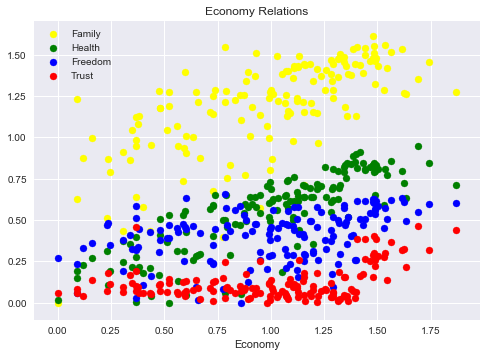

In [7]:
#data.plot(kind="scatter", x = "Economy", y ="Family", color = "yellow", label = "Economy-Family")
#data.plot(kind="scatter", x = "Economy", y ="Health", color = "green", label = "Economy-Health")
#data.plot(kind="scatter", x = "Economy", y ="Freedom", color = "blue", label = "Economy- Freedom")
plt.scatter(data.Economy, data.Family, color = "yellow", label = "Family")
plt.scatter(data.Economy, data.Health, color = "green", label = "Health")
plt.scatter(data.Economy, data.Freedom, color = "blue", label = "Freedom")
plt.scatter(data.Economy, data.Government_trust, color = "red", label = "Trust")
plt.xlabel('Economy') 
plt.legend()
plt.title('Economy Relations')            
plt.show()

From Above graph its clear that Family and Health affect a better Money.

### Region wise analysis of data 

We now calculate the region wise Happiness score and Plot a graph region wise.

In [8]:
all_regions = data.Region
unique_regions = set(all_regions)    #in here I am getting the names of each possible region to put them on dictionary.
print(unique_regions)

print(len(unique_regions))

{'Southeastern Asia', 'Southern Asia', 'Middle East and Northern Africa', 'Australia and New Zealand', 'North America', 'Latin America and Caribbean', 'Eastern Asia', 'Central and Eastern Europe', 'Sub-Saharan Africa', 'Western Europe'}
10


In [9]:
region_colors = {'Middle East and Northern Africa':'red',
                 'Latin America and Caribbean':'green',
                 'Eastern Asia':'aqua',
                 'Sub-Saharan Africa':'blue',
                 'Southeastern Asia':'grey',
                 'Western Europe':'pink',
                 'North America':'yellow',
                 'Australia and New Zealand':'orange',
                 'Central and Eastern Europe':'purple',
                 'Southern Asia':'olive'};

type(region_colors)

dict

In [10]:
colors = []
for i in data['Region']:
    
    colors.append(region_colors[i])

### Group Region wise average for the data

In [11]:
#Avg_Region =[]
#for i in data['Region']:
df=data.groupby(['Region']).mean()

df.sort_values(by='Happiness_Score')

#df.plot(y='Happiness_Score', use_index=True)


,Happiness_Rank,Happiness_Score,Whisker_high,Whisker_low,Economy,Family,Health,Freedom,Generosity,Government_trust,Dystopia_Residual
Region,,,,,,,,,,,
Sub-Saharan Africa,128.777778,4.084722,4.199419,3.970026,0.505108,0.966164,0.226383,0.348350,0.230554,0.095284,1.712818
Southern Asia,109.857143,4.628429,4.713590,4.543268,0.697479,0.931875,0.456658,0.398971,0.341446,0.103066,1.698851
Middle East and Northern Africa,76.421053,5.369684,5.478411,5.260957,1.168535,1.095511,0.605980,0.363768,0.199172,0.149084,1.787599
Central and Eastern Europe,75.068966,5.409931,5.494203,5.325659,1.092051,1.282285,0.636090,0.346609,0.186116,0.079620,1.787129
Southeastern Asia,73.750000,5.444875,5.533073,5.356677,0.965253,1.249948,0.581918,0.534971,0.449860,0.127591,1.535369
Eastern Asia,71.250000,5.496500,5.563559,5.429441,1.231749,1.304615,0.778222,0.407620,0.173630,0.070685,1.529958
Latin America and Caribbean,50.809524,5.957905,6.072795,5.843015,1.011695,1.300096,0.618667,0.444541,0.209300,0.087344,2.286212
Western Europe,27.142857,6.703714,6.775812,6.631617,1.457411,1.444946,0.824673,0.515125,0.303497,0.218999,1.939043
North America,10.500000,7.154500,7.229530,7.079470,1.512732,1.450635,0.804422,0.558421,0.414059,0.211505,2.202689


From above data we observe that the developed countries have better Happiness score , because of the better Economy,Health and Family life that the countries from Asia or Africa.

### Plot region wise happiness scores

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149 entries, 0 to 148
Data columns (total 13 columns):
Country              149 non-null object
Happiness_Rank       149 non-null int64
Happiness_Score      149 non-null float64
Whisker_high         149 non-null float64
Whisker_low          149 non-null float64
Economy              149 non-null float64
Family               149 non-null float64
Health               149 non-null float64
Freedom              149 non-null float64
Generosity           149 non-null float64
Government_trust     149 non-null float64
Dystopia_Residual    149 non-null float64
Region               149 non-null object
dtypes: float64(10), int64(1), object(2)
memory usage: 21.3+ KB


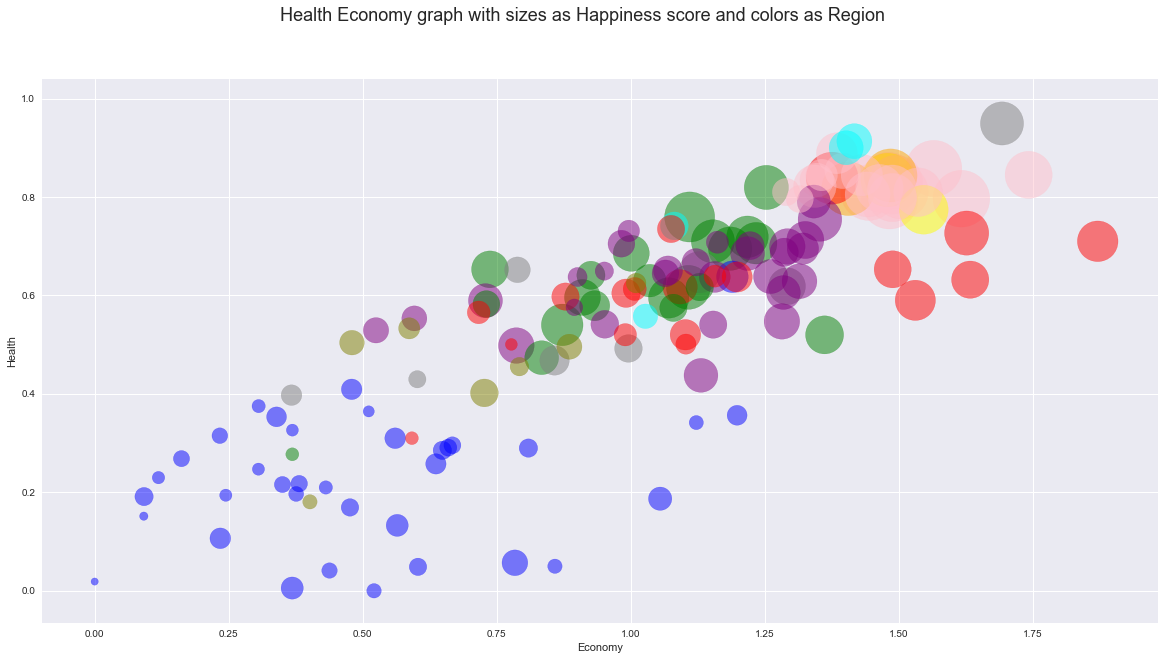

In [12]:
data.info()
plt.clf()
plt.figure(figsize=(20,10))
plt.scatter(data['Economy'], data['Health'], s=(data['Happiness_Score']**4), alpha=0.5, c=colors)
plt.grid(True)

plt.xlabel("Economy")
plt.ylabel("Health")

plt.suptitle("Health Economy graph with sizes as Happiness score and colors as Region", fontsize=18)

plt.show()

The chart above clearly shows Regions by color, Happiness scores by the size of each scatter.

What we see clearly is, Sub-Saharan countries has very low Economy and Health. An by this, they have lowest scores of happiness most of the time.

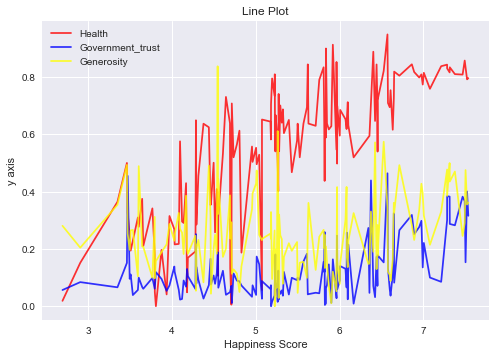

In [13]:
plt.plot(data.Happiness_Score, data.Health, color = "red", label = "Health",alpha = 0.8)
plt.plot(data.Happiness_Score, data.Government_trust, color = "blue", label = "Government_trust",alpha = 0.8)
plt.plot(data.Happiness_Score, data.Generosity, color = "yellow", label = "Generosity",alpha = 0.8)


plt.legend()    
plt.xlabel('Happiness Score')           
plt.ylabel('y axis')
plt.title('Line Plot')            # title = title of plot
plt.show()

### Plot  scattered plot to analyze the dependencies for Happiness score

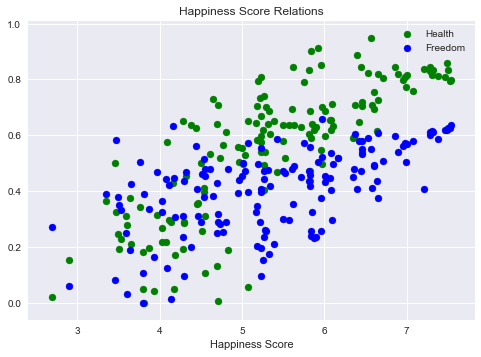

In [14]:
plt.scatter(data.Happiness_Score, data.Health, color = "green", label = "Health")
plt.scatter(data.Happiness_Score, data.Freedom, color = "blue", label = "Freedom")
plt.xlabel('Happiness Score') 
plt.legend()
plt.title('Happiness Score Relations')            
plt.show()

### Calulate the Happiness score and plot a histogram to look at the distribution based on various factors

Histogram plot is useful to analyze the data with frequency differences. Also, in the beginning this graphs is very useful to understand mean values and distiributions. For histogram plot, I want to analyze "Happy and Unhappy countries behaviours". Note: Mean of the Happiness score is approximately 5.3 therefore I'll use that data as a threashold on dividing happy and unhappy dataset.

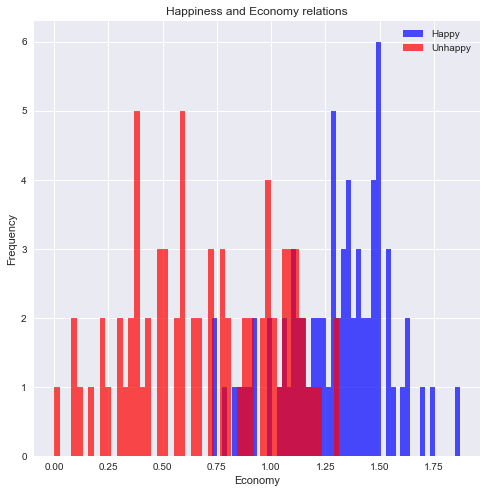

In [15]:
happy = data[data["Happiness_Score"] > 5.3] 
unhappy = data[data["Happiness_Score"] < 5.3] 

happy.Economy.plot(kind = 'hist',bins = 50,figsize = (8,8), color = "blue", alpha = 0.7, label = "Happy")
unhappy.Economy.plot(kind = 'hist',bins = 50,figsize = (8,8), color = "red", alpha = 0.7, label = "Unhappy")

plt.xlabel('Economy')             
plt.title('Happiness and Economy relations') 
plt.legend()
plt.show()

As it seems from the figure, in "Happy" counties Economical situation is better than "Unhappy" countries. Then I want focussing on "How Freedom has effect on Happy and Unhappy countries?"

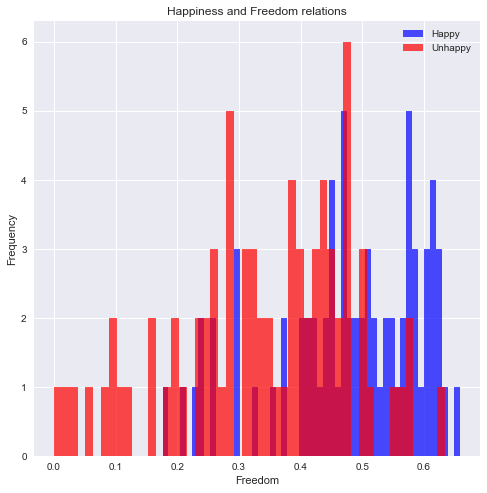

In [16]:
happy = data[data["Happiness_Score"] > 5.3] 
unhappy = data[data["Happiness_Score"] < 5.3]

happy.Freedom.plot(kind = 'hist',bins = 50,figsize = (8,8), color = "blue", alpha = 0.7, label = "Happy")
unhappy.Freedom.plot(kind = 'hist',bins = 50,figsize = (8,8), color = "red", alpha = 0.7, label = "Unhappy")

plt.xlabel('Freedom')             
plt.title('Happiness and Freedom relations') 
plt.legend()
plt.show()

For Freedom perspective, it is hard to distinguish values because both graphs mean values are very similar with each other.

It means that Economical situation has more power than Freedom to distinguish countries with each other.

##### Visualization of Happiness Score: Using Choropleth feature

We will try to plot the happiness score of countries in the world map. Hovering the mouse over the country shows the name of the country as well as its happiness score.

In [17]:
import plotly.plotly as py #For World Map
import plotly.graph_objs as go

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)


dat = dict(type = 'choropleth', 
           locations = data['Country'],
           locationmode = 'country names',
           z = data['Happiness_Score'], 
           text = data['Country'],
           colorbar = {'title':'Happiness'})
layout = dict(title = 'Happiness Index 2017', 
             geo = dict(showframe = False, 
                       projection = {'type': 'Mercator'}))
choromap3 = go.Figure(data = [dat], layout=layout)
iplot(choromap3)

### Conclusion

Analysis and graphs on the data shows that, there are some really big factors on Happiness such as Health, Family and Economy.

It's also visible that some Regions on world has averagely higher Scores than the others. For example, Eastern Europe and Sub-Saharan Africa has dramatic difference.

#### Analyze the 2016 dataset

In [18]:
data = pd.read_csv("input/2016.csv")
print("Data Info")
#data.info()
#Change . sepertor with _ 
data.columns = data.columns.str.replace(" ", "")
data.columns = data.columns.str.replace("(", "")
data.columns = data.columns.str.replace(")", "")

#data_tmp.info()

#data=data.merge(data_tmp, on="Country")
data.info()

#if x == 'Z' else 'green' for x in df['Set']



Data Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
Country                      157 non-null object
Region                       157 non-null object
HappinessRank                157 non-null int64
HappinessScore               157 non-null float64
LowerConfidenceInterval      157 non-null float64
UpperConfidenceInterval      157 non-null float64
EconomyGDPperCapita          157 non-null float64
Family                       157 non-null float64
HealthLifeExpectancy         157 non-null float64
Freedom                      157 non-null float64
TrustGovernmentCorruption    157 non-null float64
Generosity                   157 non-null float64
DystopiaResidual             157 non-null float64
dtypes: float64(10), int64(1), object(2)
memory usage: 16.0+ KB


In [19]:
data.tail() 

,Country,Region,HappinessRank,HappinessScore,LowerConfidenceInterval,UpperConfidenceInterval,EconomyGDPperCapita,Family,HealthLifeExpectancy,Freedom,TrustGovernmentCorruption,Generosity,DystopiaResidual
152,Benin,Sub-Saharan Africa,153,3.484,3.404,3.564,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812
153,Afghanistan,Southern Asia,154,3.360,3.288,3.432,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558
154,Togo,Sub-Saharan Africa,155,3.303,3.192,3.414,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540
155,Syria,Middle East and Northern Africa,156,3.069,2.936,3.202,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789
156,Burundi,Sub-Saharan Africa,157,2.905,2.732,3.078,0.06831,0.23442,0.15747,0.04320,0.09419,0.20290,2.10404


### Change Column Name of the dataframe

In [20]:
data.columns = data.columns.str.replace("EconomyGDPperCapita", "Economy")
data.columns = data.columns.str.replace("HealthLifeExpectancy","Health")
data.columns = data.columns.str.replace("TrustGovernmentCorruption","Government_trust")
data.columns

Index(['Country', 'Region', 'HappinessRank', 'HappinessScore',
       'LowerConfidenceInterval', 'UpperConfidenceInterval', 'Economy',
       'Family', 'Health', 'Freedom', 'Government_trust', 'Generosity',
       'DystopiaResidual'],
      dtype='object')

### Plot the heatmap to understand the co-relation of columns

2016 data set


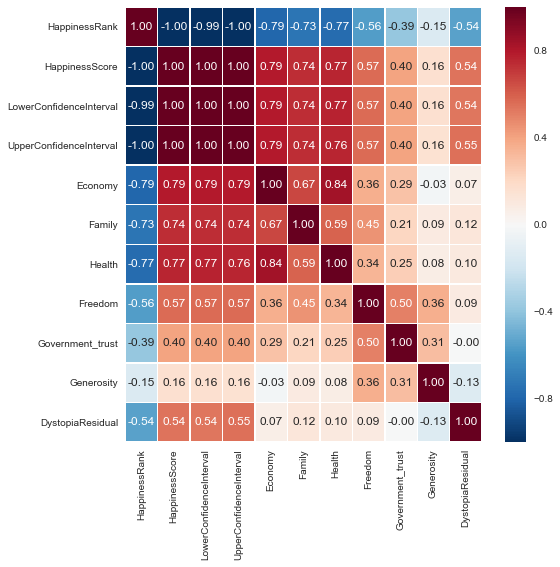

,HappinessRank,HappinessScore,LowerConfidenceInterval,UpperConfidenceInterval,Economy,Family,Health,Freedom,Government_trust,Generosity,DystopiaResidual
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,78.980892,5.382185,5.282395,5.481975,0.953880,0.793621,0.557619,0.370994,0.137624,0.242635,2.325807
std,45.466030,1.141674,1.148043,1.136493,0.412595,0.266706,0.229349,0.145507,0.111038,0.133756,0.542220
min,1.000000,2.905000,2.732000,3.078000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.817890
25%,40.000000,4.404000,4.327000,4.465000,0.670240,0.641840,0.382910,0.257480,0.061260,0.154570,2.031710
50%,79.000000,5.314000,5.237000,5.419000,1.027800,0.841420,0.596590,0.397470,0.105470,0.222450,2.290740
75%,118.000000,6.269000,6.154000,6.434000,1.279640,1.021520,0.729930,0.484530,0.175540,0.311850,2.664650
max,157.000000,7.526000,7.460000,7.669000,1.824270,1.183260,0.952770,0.608480,0.505210,0.819710,3.837720


In [21]:
print("2016 data set")
data.corr() 
#correlation map view
f, ax = plt.subplots(figsize = (8,8))
sns.heatmap(data.corr(), annot = True, linewidths=.5, fmt = ".2f", ax=ax)
plt.show()
data.describe()

### Plot the dependent columns based on the hapiness score

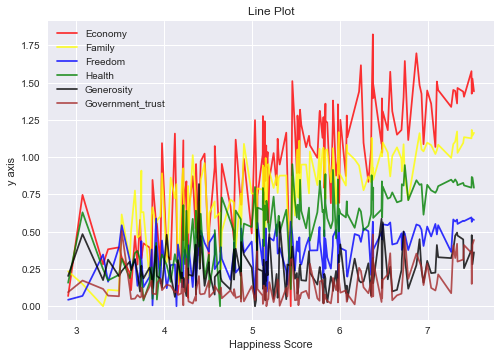

In [22]:
plt.plot(data.HappinessScore, data.Economy, color = "red", label = "Economy",alpha = 0.8)
plt.plot(data.HappinessScore, data.Family, color = "yellow", label = "Family",alpha = 0.8)
plt.plot(data.HappinessScore, data.Freedom, color = "blue", label = "Freedom",alpha = 0.8)
plt.plot(data.HappinessScore, data.Health, color = "green", label = "Health",alpha = 0.8)
plt.plot(data.HappinessScore, data.Generosity, color = "black", label = "Generosity",alpha = 0.8)
plt.plot(data.HappinessScore, data.Government_trust, color = "brown", label = "Government_trust",alpha = 0.8)


plt.legend()    
plt.xlabel('Happiness Score')           
plt.ylabel('y axis')
plt.title('Line Plot')            # title = title of plot
plt.show()

### Visualize the data 

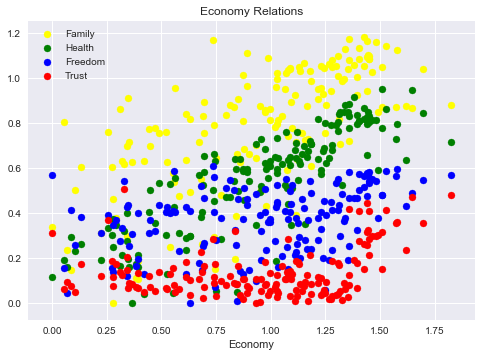

In [23]:
#data.plot(kind="scatter", x = "Economy", y ="Family", color = "yellow", label = "Economy-Family")
#data.plot(kind="scatter", x = "Economy", y ="Health", color = "green", label = "Economy-Health")
#data.plot(kind="scatter", x = "Economy", y ="Freedom", color = "blue", label = "Economy- Freedom")
plt.scatter(data.Economy, data.Family, color = "yellow", label = "Family")
plt.scatter(data.Economy, data.Health, color = "green", label = "Health")
plt.scatter(data.Economy, data.Freedom, color = "blue", label = "Freedom")
plt.scatter(data.Economy, data.Government_trust, color = "red", label = "Trust")
plt.xlabel('Economy') 
plt.legend()
plt.title('Economy Relations')            
plt.show()

### Region wise analysis of data 

In [24]:
all_regions = data.Region
unique_regions = set(all_regions)    #in here I am getting the names of each possible region to put them on dictionary.
print(unique_regions)

print(len(unique_regions))

{'Southeastern Asia', 'Southern Asia', 'Middle East and Northern Africa', 'Australia and New Zealand', 'North America', 'Latin America and Caribbean', 'Eastern Asia', 'Central and Eastern Europe', 'Sub-Saharan Africa', 'Western Europe'}
10


In [25]:
region_colors = {'Middle East and Northern Africa':'red',
                 'Latin America and Caribbean':'green',
                 'Eastern Asia':'aqua',
                 'Sub-Saharan Africa':'blue',
                 'Southeastern Asia':'grey',
                 'Western Europe':'pink',
                 'North America':'yellow',
                 'Australia and New Zealand':'orange',
                 'Central and Eastern Europe':'purple',
                 'Southern Asia':'olive'};

type(region_colors)

dict

In [26]:
colors = []
for i in data['Region']:
    
    colors.append(region_colors[i])

### Group Region wise average for the data

In [27]:
#Avg_Region =[]
#for i in data['Region']:
df=data.groupby(['Region']).mean()

df.sort_values(by='HappinessScore')

#df.plot(y='Happiness_Score', use_index=True)


,HappinessRank,HappinessScore,LowerConfidenceInterval,UpperConfidenceInterval,Economy,Family,Health,Freedom,Government_trust,Generosity,DystopiaResidual
Region,,,,,,,,,,,
Sub-Saharan Africa,129.657895,4.136421,4.024895,4.247947,0.474321,0.593656,0.239872,0.315424,0.120379,0.226348,2.166359
Southern Asia,111.714286,4.563286,4.485000,4.641571,0.660671,0.480694,0.453670,0.350026,0.104899,0.343281,2.170101
Southeastern Asia,80.000000,5.338889,5.249556,5.428222,0.896381,0.791756,0.561369,0.490123,0.148104,0.446150,2.004910
Central and Eastern Europe,78.448276,5.370690,5.283690,5.457690,1.047537,0.861855,0.631592,0.300528,0.088072,0.170898,2.270222
Middle East and Northern Africa,78.105263,5.386053,5.274895,5.497211,1.139323,0.695644,0.616438,0.309769,0.161526,0.186749,2.276677
Eastern Asia,67.166667,5.624167,5.550167,5.698167,1.277312,0.910428,0.806680,0.387282,0.118347,0.223563,1.900682
Latin America and Caribbean,48.333333,6.101750,5.976750,6.226750,0.993410,0.898432,0.612703,0.426646,0.106016,0.208428,2.856078
Western Europe,29.190476,6.685667,6.604571,6.766762,1.417056,1.042452,0.825754,0.477587,0.232544,0.304715,2.385576
North America,9.500000,7.254000,7.177500,7.330500,1.474055,1.071960,0.803300,0.527665,0.230985,0.429555,2.716335


### Plot region wise happiness scores

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
Country                    157 non-null object
Region                     157 non-null object
HappinessRank              157 non-null int64
HappinessScore             157 non-null float64
LowerConfidenceInterval    157 non-null float64
UpperConfidenceInterval    157 non-null float64
Economy                    157 non-null float64
Family                     157 non-null float64
Health                     157 non-null float64
Freedom                    157 non-null float64
Government_trust           157 non-null float64
Generosity                 157 non-null float64
DystopiaResidual           157 non-null float64
dtypes: float64(10), int64(1), object(2)
memory usage: 16.0+ KB


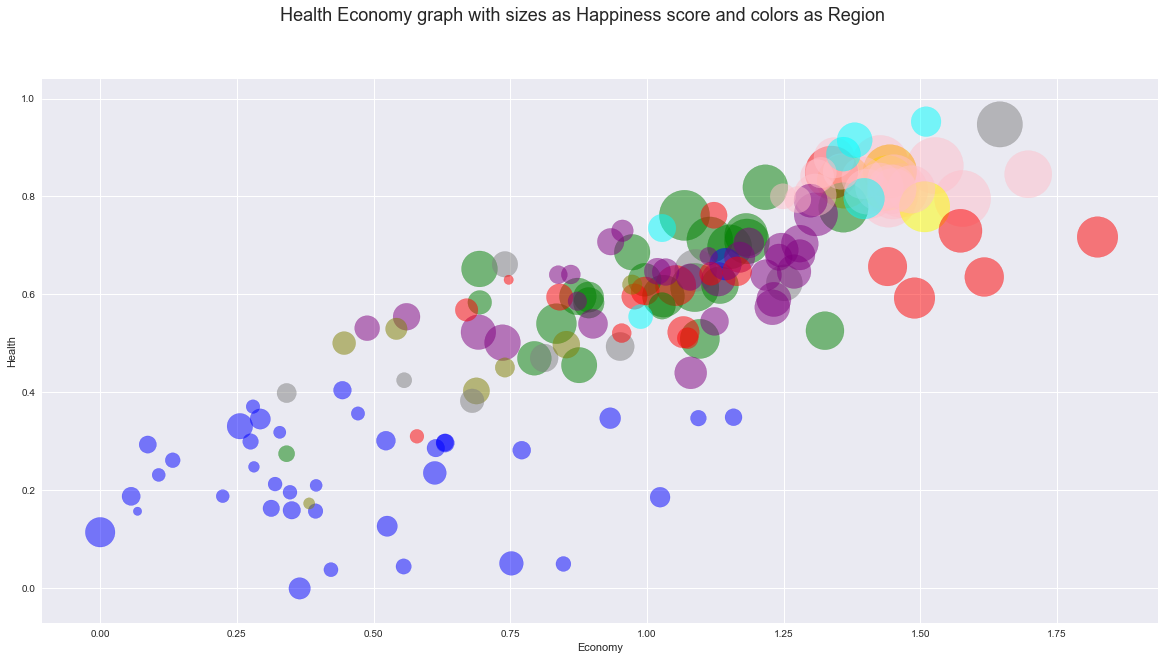

In [28]:
data.info()
plt.clf()
plt.figure(figsize=(20,10))
plt.scatter(data['Economy'], data['Health'], s=(data['HappinessScore']**4), alpha=0.5, c=colors)
plt.grid(True)

plt.xlabel("Economy")
plt.ylabel("Health")

plt.suptitle("Health Economy graph with sizes as Happiness score and colors as Region", fontsize=18)

plt.show()

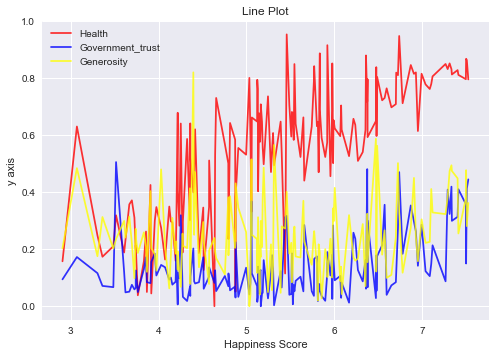

In [29]:
plt.plot(data.HappinessScore, data.Health, color = "red", label = "Health",alpha = 0.8)
plt.plot(data.HappinessScore, data.Government_trust, color = "blue", label = "Government_trust",alpha = 0.8)
plt.plot(data.HappinessScore, data.Generosity, color = "yellow", label = "Generosity",alpha = 0.8)


plt.legend()    
plt.xlabel('Happiness Score')           
plt.ylabel('y axis')
plt.title('Line Plot')            # title = title of plot
plt.show()

### Plot  scattered plot to analyze the dependencies for Happiness score

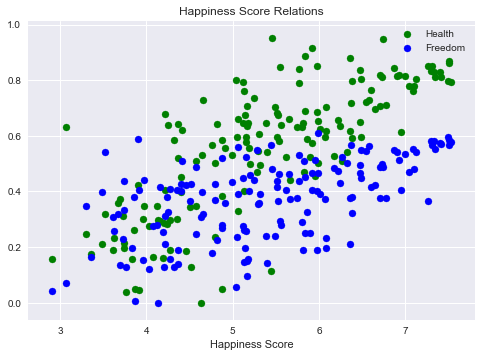

In [30]:
plt.scatter(data.HappinessScore, data.Health, color = "green", label = "Health")
plt.scatter(data.HappinessScore, data.Freedom, color = "blue", label = "Freedom")
plt.xlabel('Happiness Score') 
plt.legend()
plt.title('Happiness Score Relations')            
plt.show()

### Calulate the Happiness score and plot a histogram to look at the distribution based on various factors

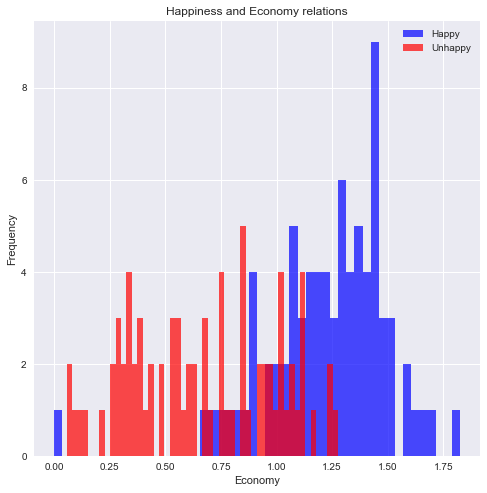

In [31]:
happy = data[data["HappinessScore"] > 5.3] 
unhappy = data[data["HappinessScore"] < 5.3] 

happy.Economy.plot(kind = 'hist',bins = 50,figsize = (8,8), color = "blue", alpha = 0.7, label = "Happy")
unhappy.Economy.plot(kind = 'hist',bins = 50,figsize = (8,8), color = "red", alpha = 0.7, label = "Unhappy")

plt.xlabel('Economy')             
plt.title('Happiness and Economy relations') 
plt.legend()
plt.show()

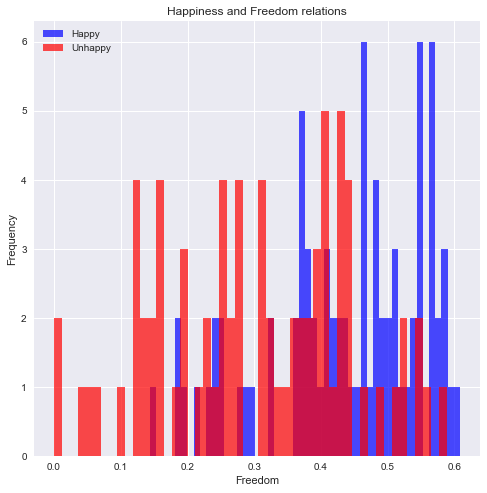

In [32]:
happy = data[data["HappinessScore"] > 5.3] 
unhappy = data[data["HappinessScore"] < 5.3]

happy.Freedom.plot(kind = 'hist',bins = 50,figsize = (8,8), color = "blue", alpha = 0.7, label = "Happy")
unhappy.Freedom.plot(kind = 'hist',bins = 50,figsize = (8,8), color = "red", alpha = 0.7, label = "Unhappy")

plt.xlabel('Freedom')             
plt.title('Happiness and Freedom relations') 
plt.legend()
plt.show()

In [33]:
import plotly.plotly as py #For World Map
import plotly.graph_objs as go

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)


dat = dict(type = 'choropleth', 
           locations = data['Country'],
           locationmode = 'country names',
           z = data['HappinessScore'], 
           text = data['Country'],
           colorbar = {'title':'Happiness'})
layout = dict(title = 'Happiness Index 2016', 
             geo = dict(showframe = False, 
                       projection = {'type': 'Mercator'}))
choromap3 = go.Figure(data = [dat], layout=layout)
iplot(choromap3)

#### Analyze the 2015 dataset

In [34]:
data = pd.read_csv("input/2015.csv")
print("Data Info")
#data.info()
#Change . sepertor with _ 
data.columns = data.columns.str.replace(" ", "")
data.columns = data.columns.str.replace("(", "")
data.columns = data.columns.str.replace(")", "")



Data Info


In [35]:
data.tail() 

,Country,Region,HappinessRank,HappinessScore,StandardError,EconomyGDPperCapita,Family,HealthLifeExpectancy,Freedom,TrustGovernmentCorruption,Generosity,DystopiaResidual
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


### Change Column Name of the dataframe

In [36]:
data.columns = data.columns.str.replace("EconomyGDPperCapita", "Economy")
data.columns = data.columns.str.replace("HealthLifeExpectancy","Health")
data.columns = data.columns.str.replace("TrustGovernmentCorruption","Government_trust")
data.columns

Index(['Country', 'Region', 'HappinessRank', 'HappinessScore', 'StandardError',
       'Economy', 'Family', 'Health', 'Freedom', 'Government_trust',
       'Generosity', 'DystopiaResidual'],
      dtype='object')

### Plot the heatmap to understand the co-relation of columns

2015 data set


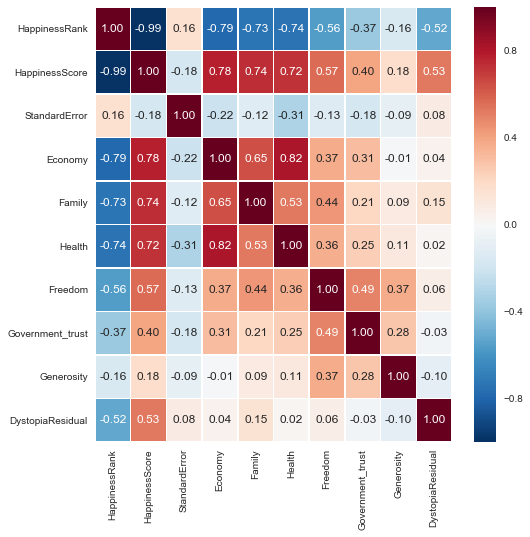

,HappinessRank,HappinessScore,StandardError,Economy,Family,Health,Freedom,Government_trust,Generosity,DystopiaResidual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [37]:
print("2015 data set")
data.corr() 
#correlation map view
f, ax = plt.subplots(figsize = (8,8))
sns.heatmap(data.corr(), annot = True, linewidths=.5, fmt = ".2f", ax=ax)
plt.show()
data.describe()

### Plot the dependent columns based on the hapiness score

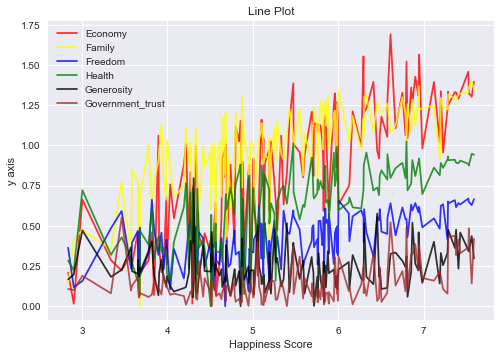

In [38]:
plt.plot(data.HappinessScore, data.Economy, color = "red", label = "Economy",alpha = 0.8)
plt.plot(data.HappinessScore, data.Family, color = "yellow", label = "Family",alpha = 0.8)
plt.plot(data.HappinessScore, data.Freedom, color = "blue", label = "Freedom",alpha = 0.8)
plt.plot(data.HappinessScore, data.Health, color = "green", label = "Health",alpha = 0.8)
plt.plot(data.HappinessScore, data.Generosity, color = "black", label = "Generosity",alpha = 0.8)
plt.plot(data.HappinessScore, data.Government_trust, color = "brown", label = "Government_trust",alpha = 0.8)


plt.legend()    
plt.xlabel('Happiness Score')           
plt.ylabel('y axis')
plt.title('Line Plot')            # title = title of plot
plt.show()

### Visualize the data 

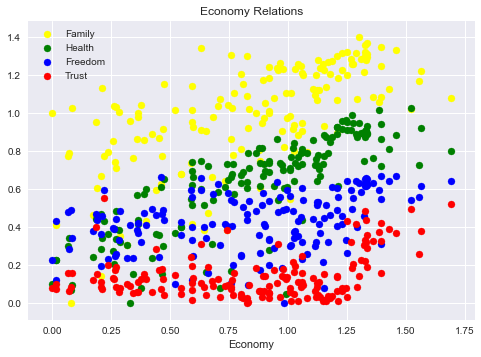

In [39]:
#data.plot(kind="scatter", x = "Economy", y ="Family", color = "yellow", label = "Economy-Family")
#data.plot(kind="scatter", x = "Economy", y ="Health", color = "green", label = "Economy-Health")
#data.plot(kind="scatter", x = "Economy", y ="Freedom", color = "blue", label = "Economy- Freedom")
plt.scatter(data.Economy, data.Family, color = "yellow", label = "Family")
plt.scatter(data.Economy, data.Health, color = "green", label = "Health")
plt.scatter(data.Economy, data.Freedom, color = "blue", label = "Freedom")
plt.scatter(data.Economy, data.Government_trust, color = "red", label = "Trust")
plt.xlabel('Economy') 
plt.legend()
plt.title('Economy Relations')            
plt.show()

### Region wise analysis of data 

In [40]:
all_regions = data.Region
unique_regions = set(all_regions)    #in here I am getting the names of each possible region to put them on dictionary.
print(unique_regions)

print(len(unique_regions))

{'Southeastern Asia', 'Southern Asia', 'Middle East and Northern Africa', 'Australia and New Zealand', 'North America', 'Latin America and Caribbean', 'Eastern Asia', 'Central and Eastern Europe', 'Sub-Saharan Africa', 'Western Europe'}
10


In [41]:
region_colors = {'Middle East and Northern Africa':'red',
                 'Latin America and Caribbean':'green',
                 'Eastern Asia':'aqua',
                 'Sub-Saharan Africa':'blue',
                 'Southeastern Asia':'grey',
                 'Western Europe':'pink',
                 'North America':'yellow',
                 'Australia and New Zealand':'orange',
                 'Central and Eastern Europe':'purple',
                 'Southern Asia':'olive'};

type(region_colors)

dict

In [42]:
colors = []
for i in data['Region']:
    
    colors.append(region_colors[i])

### Group Region wise average for the data

In [43]:
#Avg_Region =[]
#for i in data['Region']:
df=data.groupby(['Region']).mean()

df.sort_values(by='HappinessScore')

#df.plot(y='Happiness_Score', use_index=True)


,HappinessRank,HappinessScore,StandardError,Economy,Family,Health,Freedom,Government_trust,Generosity,DystopiaResidual
Region,,,,,,,,,,
Sub-Saharan Africa,127.900000,4.202800,0.055299,0.380473,0.809085,0.282332,0.365944,0.123878,0.221137,2.019980
Southern Asia,113.142857,4.580857,0.032161,0.560486,0.645321,0.540830,0.373337,0.102536,0.341429,2.016769
Southeastern Asia,81.222222,5.317444,0.042691,0.789054,0.940468,0.677357,0.557104,0.151276,0.419261,1.783020
Central and Eastern Europe,79.000000,5.332931,0.045208,0.942438,1.053042,0.718774,0.358269,0.086674,0.152264,2.021400
Middle East and Northern Africa,77.600000,5.406900,0.046337,1.066973,0.920490,0.705616,0.361751,0.181702,0.190375,1.980009
Eastern Asia,64.500000,5.626167,0.037225,1.151780,1.099427,0.877388,0.462490,0.127695,0.225885,1.681607
Latin America and Caribbean,46.909091,6.144682,0.061127,0.876815,1.104720,0.703870,0.501740,0.117172,0.217788,2.622577
Western Europe,29.523810,6.689619,0.037625,1.298596,1.247302,0.909148,0.549926,0.231463,0.302109,2.151185
North America,10.000000,7.273000,0.036960,1.360400,1.284860,0.883710,0.589505,0.244235,0.429580,2.480935


### Plot region wise happiness scores

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
Country             158 non-null object
Region              158 non-null object
HappinessRank       158 non-null int64
HappinessScore      158 non-null float64
StandardError       158 non-null float64
Economy             158 non-null float64
Family              158 non-null float64
Health              158 non-null float64
Freedom             158 non-null float64
Government_trust    158 non-null float64
Generosity          158 non-null float64
DystopiaResidual    158 non-null float64
dtypes: float64(9), int64(1), object(2)
memory usage: 14.9+ KB


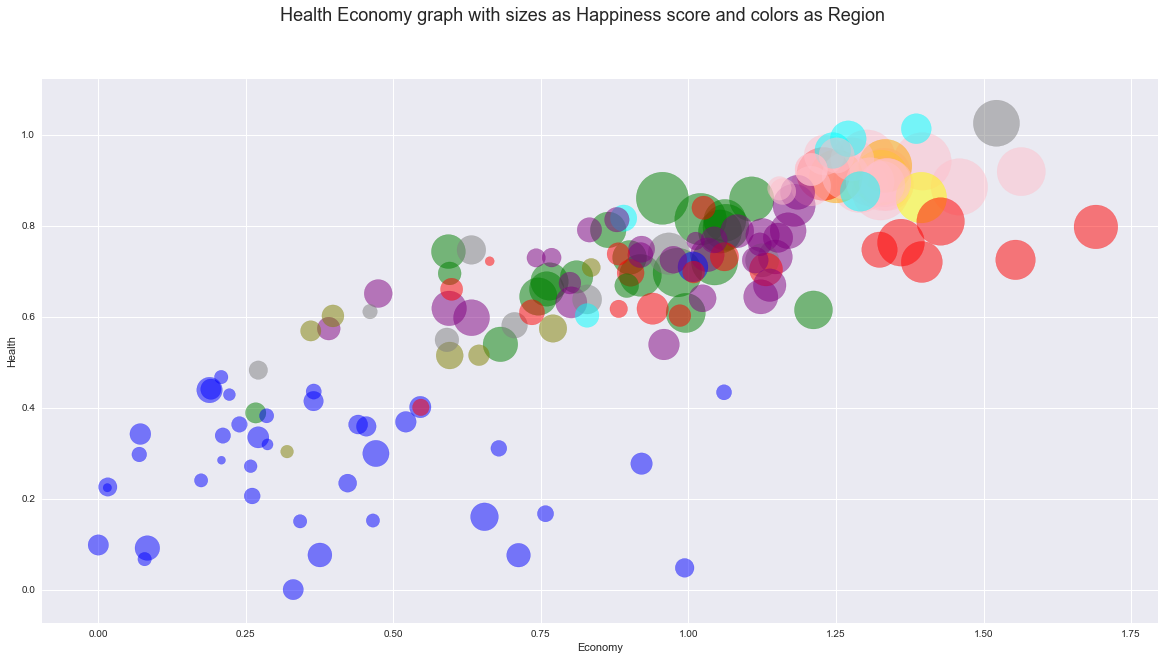

In [44]:
data.info()
plt.clf()
plt.figure(figsize=(20,10))
plt.scatter(data['Economy'], data['Health'], s=(data['HappinessScore']**4), alpha=0.5, c=colors)
plt.grid(True)

plt.xlabel("Economy")
plt.ylabel("Health")

plt.suptitle("Health Economy graph with sizes as Happiness score and colors as Region", fontsize=18)

plt.show()

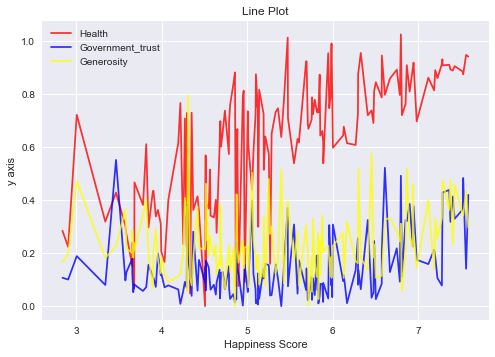

In [45]:
plt.plot(data.HappinessScore, data.Health, color = "red", label = "Health",alpha = 0.8)
plt.plot(data.HappinessScore, data.Government_trust, color = "blue", label = "Government_trust",alpha = 0.8)
plt.plot(data.HappinessScore, data.Generosity, color = "yellow", label = "Generosity",alpha = 0.8)


plt.legend()    
plt.xlabel('Happiness Score')           
plt.ylabel('y axis')
plt.title('Line Plot')            # title = title of plot
plt.show()

### Plot  scattered plot to analyze the dependencies for Happiness score

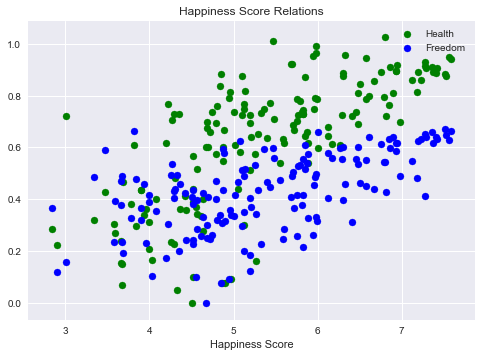

In [46]:
plt.scatter(data.HappinessScore, data.Health, color = "green", label = "Health")
plt.scatter(data.HappinessScore, data.Freedom, color = "blue", label = "Freedom")
plt.xlabel('Happiness Score') 
plt.legend()
plt.title('Happiness Score Relations')            
plt.show()

### Calulate the Happiness score and plot a histogram to look at the distribution based on various factors

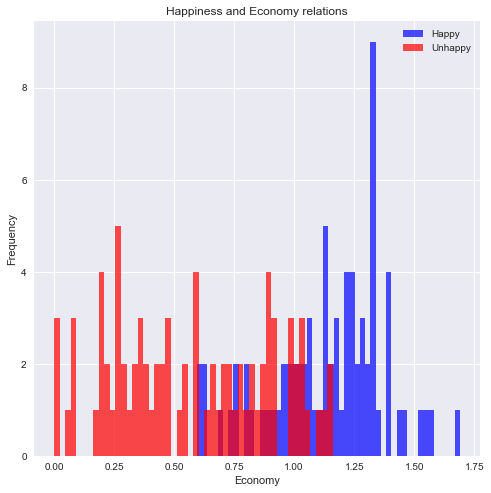

In [47]:
happy = data[data["HappinessScore"] > 5.3] 
unhappy = data[data["HappinessScore"] < 5.3] 

happy.Economy.plot(kind = 'hist',bins = 50,figsize = (8,8), color = "blue", alpha = 0.7, label = "Happy")
unhappy.Economy.plot(kind = 'hist',bins = 50,figsize = (8,8), color = "red", alpha = 0.7, label = "Unhappy")

plt.xlabel('Economy')             
plt.title('Happiness and Economy relations') 
plt.legend()
plt.show()

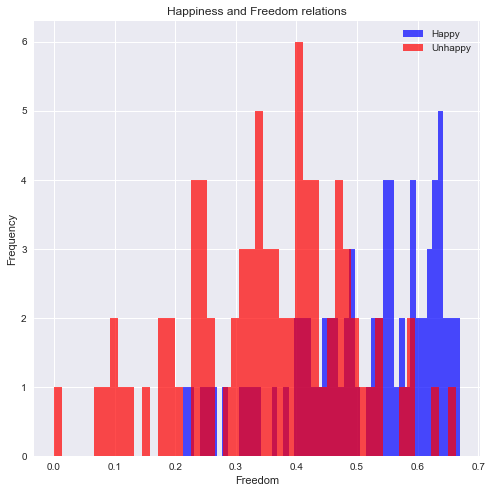

In [48]:
happy = data[data["HappinessScore"] > 5.3] 
unhappy = data[data["HappinessScore"] < 5.3]

happy.Freedom.plot(kind = 'hist',bins = 50,figsize = (8,8), color = "blue", alpha = 0.7, label = "Happy")
unhappy.Freedom.plot(kind = 'hist',bins = 50,figsize = (8,8), color = "red", alpha = 0.7, label = "Unhappy")

plt.xlabel('Freedom')             
plt.title('Happiness and Freedom relations') 
plt.legend()
plt.show()

In [49]:
import plotly.plotly as py #For World Map
import plotly.graph_objs as go

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)


dat = dict(type = 'choropleth', 
           locations = data['Country'],
           locationmode = 'country names',
           z = data['HappinessScore'], 
           text = data['Country'],
           colorbar = {'title':'Happiness'})
layout = dict(title = 'Happiness Index 2015', 
             geo = dict(showframe = False, 
                       projection = {'type': 'Mercator'}))
choromap3 = go.Figure(data = [dat], layout=layout)
iplot(choromap3)

## Conclusion
Analysis and graphs on the data shows that, there are some really big factors on Happiness such as Health, Family and Economy.
It's also visible that some Regions on world has averagely higher Scores than the others. For example, Eastern Europe and Sub-Saharan Africa has dramatic difference.


1. What are the factors that govern happiness index?
Health , Family and Economy  factors for a good Happiness Index
2. Is happiness dependent on the Region?
Yes some Regions on world has averagely higher Scores than the others. For example, Eastern Europe and Sub-Saharan Africa has dramatic difference.
3. Corelation of the variables.
Economy is dependent on Family and Health
4. Visualizing the factors that  affect the happiness score for a country.
Economically backward countries have lower happiness score as they also lack better Family and Health than Economically stable countries.Low value of Happiness Score also implies tough living conditions for survival , where every day becomes challange for living.